In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame as DF
import matplotlib.pyplot as plt

In [2]:
import yfinance as yf
data = yf.download("AAPL", start="2003-10-10", end="2023-10-10",proxy="http://127.0.0.1:7890")
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-10-10,0.419643,0.425179,0.417321,0.422857,0.358447,174837600
2003-10-13,0.423750,0.435893,0.423571,0.434821,0.368589,279865600
2003-10-14,0.434286,0.441786,0.431964,0.438393,0.371617,275419200
2003-10-15,0.443750,0.446607,0.438929,0.443214,0.375703,610103200
2003-10-16,0.425000,0.425714,0.400179,0.415179,0.351939,975682400
...,...,...,...,...,...,...
2023-10-03,172.259995,173.630005,170.820007,172.399994,172.173172,49594600
2023-10-04,171.089996,174.210007,170.970001,173.660004,173.431519,53020300
2023-10-05,173.789993,175.449997,172.679993,174.910004,174.679871,48527900


### 1.1  Indicatos

In [3]:
#label

data['change'] = data['Close']-data['Open']   # price changing trend
'''
The closing price in next day is higher than the current, the class label is 1, else is 0.
'''
data['up']= data['change']
data['up'][data['change']>0] = 1   
data['up'][data['change']<=0] = 0


C:\Users\DELL\AppData\Local\Temp\ipykernel_8504\2265239486.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['up'][data['change']>0] = 1
C:\Users\DELL\AppData\Local\Temp\ipykernel_8504\2265239486.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['up'][data['change']<=0] = 0


In [4]:
def SMA(df, n):
    '''
    Simple Moving Average
    '''
    df['SMA_' + str(n)] = pd.Series.rolling(df['Close'], n).mean()
SMA(data, 10) 

In [5]:
def EMA(df, n):
    '''
    Exponential Moving Average 
    '''
    df['EMA_' + str(n)] = pd.Series.ewm(df['Close'],span=n, min_periods=n - 1).mean()
EMA(data,5)

In [6]:
def MOM(df, n):
    '''
    Momentum  
    Momentum shows the speed of price movements over a period of time to help investors judge the strength of a trend.
    '''
    df['MOM_' + str(n)] = pd.Series(df['Close'].diff(n))
MOM(data, 5)

In [7]:

def ROC(df, n):
    '''
    Rate of Change
    The ROC generally compares the current stock price with the stock price in the past period of time to calculate the percentage change in the stock price.
    '''
    M = df['Close'].diff(n - 1)
    N = df['Close'].shift(n - 1)

    df['ROC_' + str(n)] = pd.Series(M / N)
ROC(data,12)

In [8]:
def ATR(df, n):
    '''
    Average True Range
    
    '''
    TR_l = [0]
    for k in range(len(df.index)-1):
        TR = max(df['High'][k + 1], df['Close'][k]) - min(df['Low'][k + 1], df['Close'][k])
        TR_l.append(TR)

    TR_s = pd.Series(TR_l)

    df['ATR_' + str(n)] = pd.Series.ewm(TR_s, span=n,min_periods=n).mean().values
ATR(data, 14)

In [9]:
def BBANDS(df, n, multiplier=2, middle=False):
    '''
    Bollinger Bands
    
    '''
    ma = pd.Series.rolling(df['Close'], n).mean()
    msd = pd.Series.rolling(df['Close'], n).std()

    b1 = 4 * msd / ma
    b2 = (df['Close'] - ma + multiplier * msd) / (4 * msd)

    df['BBANDSup_' + str(n)] = b1

    if middle:
        df['BBANDSmiddle_' + str(n)] = ma

    df['BBANDSdown_' + str(n)] = b2
    
BBANDS(data,20, multiplier=2, middle=False)

In [10]:

def PPSR(df):
    '''
    Pivot Points, Supports and Resistances
    
    '''
    pp = pd.Series((df['High'] + df['Low'] + df['Close']) / 3)

    s1 = pd.Series(2 * pp - df['High'])
    s2 = pd.Series(pp - df['High'] + df['Low'])
    s3 = pd.Series(df['Low'] - 2 * (df['High'] - pp))

    r1 = pd.Series(2 * pp - df['Low'])
    r2 = pd.Series(pp + df['High'] - df['Low'])
    r3 = pd.Series(df['High'] + 2 * (pp - df['Low']))

    df['PP'] = pp
    df['S1'] = s1
    df['S2'] = s2
    df['S3'] = s3
    df['R1'] = r1
    df['R2'] = r2
    df['R3'] = r3
PPSR(data)

In [11]:
def STOK(df):
    '''
    Stochastic oscillator %K
    The "%K" line represents the difference between the latest price and the recent low price, 
    compared to the recent highest and lowest spread
    '''
    df['STOK'] = (df['Close'] - df['Low']) / (df['High'] - df['Low'])
STOK(data)

In [12]:

def STO(df, n):
    '''
    Stochastic oscillator %D
    '''
    SOk = pd.Series((df['Close'] - df['Low']) / (df['High'] - df['Low']))

    df['STO_' + str(n)] = pd.Series.ewm(SOk, span=n, min_periods=n - 1).mean()

STO(data,10)

In [13]:

def MACD(df, n_fast=12, n_slow=26):
    '''
    MACD, MACD Signal and MACD difference
    '''
    emaFast = pd.Series.ewm(df['Close'], span=n_fast,min_periods=n_slow - 1).mean()
    emaSlow = pd.Series.ewm(df['Close'], span=n_slow,min_periods=n_slow - 1).mean()
    macd = pd.Series(emaFast - emaSlow)
    macdSign = pd.Series.ewm(macd, span=9, min_periods=8).mean()
    macdDiff = pd.Series(macd - macdSign)

    df['MACD_' + str(n_fast) + '_' + str(n_slow)] = macd
    df['MACDsignal_' + str(n_fast) + '_' + str(n_slow)] = macdSign
    df['MACDdiff_' + str(n_fast) + '_' + str(n_slow)] = macdDiff

MACD(data,10)

In [14]:
def MFI(df, n):
    '''
    Money Flow Index and Ratio
    '''
    pp = (df['High'] + df['Low'] + df['Close']) / 3
    PosMF = [0]
    for k in range(len(df.index) - 1):
        if pp[k + 1] > pp[k]:
            PosMF.append(pp[k + 1] * df['Volume'][k + 1])
        else:
            PosMF.append(0)

    PosMF = pd.Series(PosMF)
    TotMF = pp * df['Volume']

    # .values was used beacause in a nonsense way PosMF/TotMF was
    # generating a double size dataFrame and the first half had datas as index
    # ! We got an RuntimeWarning because division buy zero, but it still works
    mfr = pd.Series(PosMF.values / TotMF.values)

    df['MFI_' + str(n)] = pd.Series.rolling(mfr, n).mean().values

MFI(data,10)

In [15]:
def OBV(df, n):
    '''
    On-balance Volume
    '''
    obv = [0]
    for k in range(len(df.index) - 1):
        if df['Close'][k + 1] - df['Close'][k] > 0:
            obv.append(df['Volume'][k + 1])
        if df['Close'][k + 1] - df['Close'][k] == 0:
            obv.append(0)
        if df['Close'][k + 1] - df['Close'][k] < 0:
            obv.append(-df['Volume'][k + 1])

    obv = pd.Series(obv)
    df['OBV_' + str(n)] = pd.Series.rolling(obv, n).mean().values

OBV(data, 10)

In [19]:
# delete NaN
data.dropna(inplace=True)

data

,Open,High,Low,Close,Adj Close,Volume,change,up,SMA_10,EMA_5,...,R1,R2,R3,STOK,STO_10,MACD_10_26,MACDsignal_10_26,MACDdiff_10_26,MFI_10,OBV_10
Date,,,,,,,,,,,,,,,,,,,,,
2003-11-24,0.366071,0.379821,0.365179,0.377679,0.320151,381824800,0.011608,1.0,0.377714,0.371390,...,0.383274,0.388868,0.397916,0.853708,0.484482,-0.012798,-0.011643,-0.001155,0.4,-18981200.0
2003-11-25,0.379107,0.379464,0.368036,0.369286,0.313036,268654400,-0.009821,0.0,0.376179,0.370689,...,0.376488,0.383690,0.387916,0.109380,0.416191,-0.012602,-0.011865,-0.000737,0.4,-24339280.0
2003-11-26,0.373036,0.377679,0.361607,0.370000,0.313641,245128800,-0.003036,0.0,0.373304,0.370459,...,0.377917,0.385834,0.393989,0.522214,0.435488,-0.012206,-0.011941,-0.000265,0.3,-29826720.0
2003-11-28,0.371071,0.376250,0.366429,0.373393,0.316518,76098400,0.002322,1.0,0.370607,0.371437,...,0.377619,0.381845,0.387440,0.709093,0.485279,-0.011391,-0.011821,0.000430,0.3,-43494080.0
2003-12-01,0.375714,0.390179,0.375000,0.387679,0.328628,361536000,0.011965,1.0,0.371054,0.376851,...,0.393572,0.399465,0.408751,0.835299,0.548965,-0.009147,-0.011246,0.002100,0.4,16364320.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-03,172.259995,173.630005,170.820007,172.399994,172.173172,49594600,0.139999,1.0,173.073000,172.497006,...,173.746663,175.093333,176.556661,0.562273,0.493981,-2.947469,-2.809418,-0.138051,0.4,-3941820.0
2023-10-04,171.089996,174.210007,170.970001,173.660004,173.431519,53020300,2.570007,1.0,172.889999,172.884672,...,174.923340,176.186676,178.163345,0.830246,0.555120,-2.695035,-2.786542,0.091506,0.5,7203830.0
2023-10-05,173.789993,175.449997,172.679993,174.910004,174.679871,48527900,1.120010,1.0,172.988000,173.559783,...,176.013336,177.116669,178.783340,0.805057,0.600563,-2.332821,-2.695797,0.362977,0.6,18361410.0


In [20]:
data.to_csv('Apple_data_20years.csv')

<Axes: xlabel='Date'>

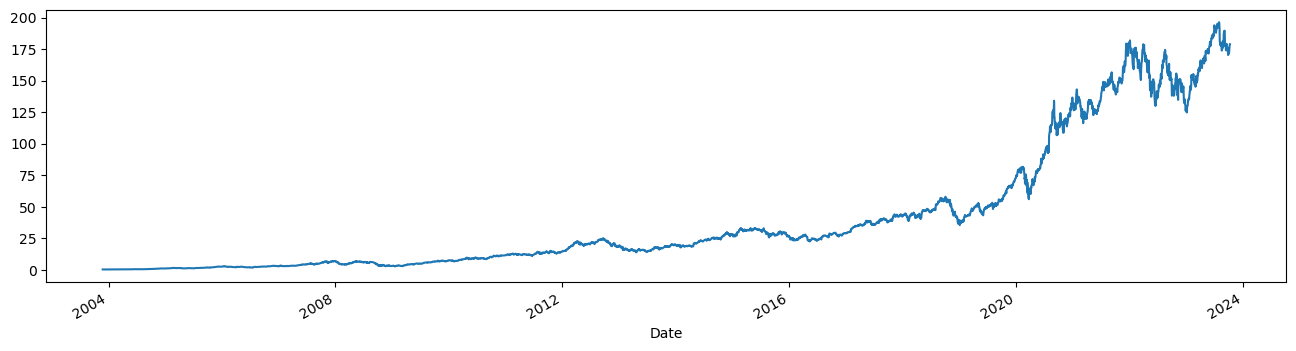

In [21]:
data['Close'].plot(figsize=(16,4),label='APPL')